## Youth Unemployment Bayesian Network

Matteo Antonio Inajetovic 0000949648

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pgmpy.factors.discrete import State
from pgmpy.factors.discrete import TabularCPD
from pgmpy.models import BayesianModel
from pgmpy.inference import VariableElimination
from pgmpy.sampling import BayesianModelSampling
import networkx as nx

In [2]:
yu_net = BayesianModel([('Gender', 'Graduate'), ('Gender', 'Unemployed'), ('N/S','Graduate'),('N/S', 'Economic_Situation'),
                        ('Economic_Situation', 'Graduate'), ('Graduate', 'Unemployed')])

cpd_gender= TabularCPD('Gender', 2, [[.5], [.5]])
cpd_ns= TabularCPD('N/S', 2, [[.5], [.5]])
cpd_situation= TabularCPD('Economic_Situation', 2, ([.06, .1],[.94, .9]), evidence=['N/S'], evidence_card= [2]) 
cpd_graduate= TabularCPD('Graduate', 2, ([.97,  .98, .89, .93, .96, .97, .86, .9],[.03, .02, .11, .07, .04, .03, .14, .10]),
                      evidence=['Gender','Economic_Situation','N/S'], evidence_card=[2,2,2]) 
cpd_unemployed= TabularCPD('Unemployed', 2, ([.78, .94, .75, .9],[.22, .06,.25, .1]),
                        evidence= ['Gender', 'Graduate'], evidence_card= [2,2])

yu_net.add_cpds(cpd_gender, cpd_ns, cpd_situation, cpd_graduate, cpd_unemployed)
print("CPDs:")
print(cpd_gender, '\n\n', cpd_ns, '\n\n', cpd_situation, '\n\n', cpd_graduate, '\n\n',cpd_unemployed, '\n\n')
print("Let's check if the sum of the probabilities for each state is equal to 1 and wheteher the CPDs associated with nodes are consistent with their parents:")
print("True or False?",yu_net.check_model())

CPDs:
+-----------+-----+
| Gender(0) | 0.5 |
+-----------+-----+
| Gender(1) | 0.5 |
+-----------+-----+ 

 +--------+-----+
| N/S(0) | 0.5 |
+--------+-----+
| N/S(1) | 0.5 |
+--------+-----+ 

 +-----------------------+--------+--------+
| N/S                   | N/S(0) | N/S(1) |
+-----------------------+--------+--------+
| Economic_Situation(0) | 0.06   | 0.1    |
+-----------------------+--------+--------+
| Economic_Situation(1) | 0.94   | 0.9    |
+-----------------------+--------+--------+ 

 +--------------------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+
| Gender             | Gender(0)             | Gender(0)             | Gender(0)             | Gender(0)             | Gender(1)             | Gender(1)             | Gender(1)             | Gender(1)             |
+--------------------+-----------------------+----------------

C:\Users\39345\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\39345\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


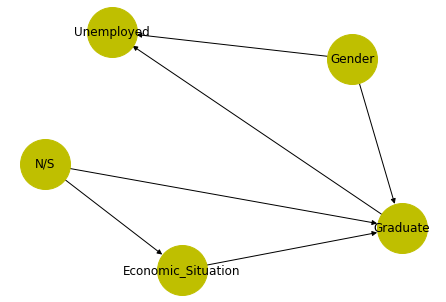

In [3]:
np.random.seed(14)
nx.draw(yu_net, with_labels = True, node_size = 2500, node_color = 'y', node_shape = 'o')
plt.show()

In [4]:
print("Independence relations between the net's variables:")
yu_net.get_independencies() 

Independence relations between the net's variables:


(Gender _|_ N/S, Economic_Situation)
(Gender _|_ Economic_Situation | N/S)
(Gender _|_ N/S | Economic_Situation)
(Unemployed _|_ N/S, Economic_Situation | Gender, Graduate)
(Unemployed _|_ Economic_Situation | N/S, Gender, Graduate)
(Unemployed _|_ N/S | Gender, Economic_Situation, Graduate)
(N/S _|_ Gender)
(N/S _|_ Gender | Economic_Situation)
(N/S _|_ Unemployed | Gender, Graduate)
(N/S _|_ Unemployed | Gender, Economic_Situation, Graduate)
(Economic_Situation _|_ Gender)
(Economic_Situation _|_ Gender | N/S)
(Economic_Situation _|_ Unemployed | Gender, Graduate)
(Economic_Situation _|_ Unemployed | N/S, Gender, Graduate)

In [5]:
print('Local independencies:\n', 
      yu_net.local_independencies(list(yu_net.nodes())))

Local independencies:
 (Gender _|_ N/S, Economic_Situation)
(Unemployed _|_ N/S, Economic_Situation | Gender, Graduate)
(N/S _|_ Gender)
(Economic_Situation _|_ Gender | N/S)


In [6]:
print("Couples of parents in the eventual V-structures present in the net:")
yu_net.get_immoralities() 

Couples of parents in the eventual V-structures present in the net:


{('Economic_Situation', 'Gender'), ('Gender', 'N/S')}

In [7]:
print("Given some evidences we can see whether a trail is active or not: ")
print("Is the trail ('Gender', 'N/S') active?")
print(yu_net.is_active_trail('Gender', 'N/S')) 
print("..but, if we add the evidence 'Graduate':")
print(yu_net.is_active_trail('Gender', 'N/S',observed = ['Graduate']))
print("Is the trail ('Economic_Situation', 'Gender') active?")
print(yu_net.is_active_trail('Gender', 'Economic_Situation')) 
print("..but, if we add the evidence 'Unemployed':")
print(yu_net.is_active_trail('Gender', 'Economic_Situation',observed = ['Unemployed']))


Given some evidences we can see whether a trail is active or not: 
Is the trail ('Gender', 'N/S') active?
False
..but, if we add the evidence 'Graduate':
True
Is the trail ('Economic_Situation', 'Gender') active?
False
..but, if we add the evidence 'Unemployed':
True


In [8]:
print('Nodes belonging to the Markov Blanket of "Graduate":\n',
      yu_net.get_markov_blanket('Graduate')) 

Nodes belonging to the Markov Blanket of "Graduate":
 ['Gender', 'N/S', 'Economic_Situation', 'Unemployed']


## Exact Inference - Variable Elimination

Now i'm going to apply an exact inference method to obtain new informations from the net, the **Variable Elimination** algorithm:

In [9]:
yu_inference = VariableElimination(yu_net)
print("Map_query execution to find the most probable combination of variables given 'Unemployed' = True:")
print(yu_inference.map_query(['Gender','N/S','Economic_Situation','Graduate'],{'Unemployed':1}))

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

Map_query execution to find the most probable combination of variables given 'Unemployed' = True:
{'Gender': 1, 'N/S': 1, 'Economic_Situation': 1, 'Graduate': 0}


In [10]:
print('P(Unemployed)')
q = yu_inference.query(['Unemployed'])
print(q)


Finding Elimination Order: :   0%|                                                               | 0/4 [00:00<?, ?it/s]

  0%|                                                                                            | 0/4 [00:00<?, ?it/s]

Eliminating: Economic_Situation:   0%|                                                           | 0/4 [00:00<?, ?it/s]

Eliminating: N/S:   0%|                                                                          | 0/4 [00:00<?, ?it/s]

P(Unemployed)




Eliminating: Graduate:   0%|                                                                     | 0/4 [00:00<?, ?it/s]

Eliminating: Gender: 100%|██████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 161.92it/s]

+---------------+-------------------+
| Unemployed    |   phi(Unemployed) |
+===============+===================+
| Unemployed(0) |            0.7803 |
+---------------+-------------------+
| Unemployed(1) |            0.2197 |
+---------------+-------------------+


### Causal Reasoning

Let's evaluate some effects given some causes:

In [11]:
print('P(Unemployed| Gender = True, N/S = True)')
q1_a = yu_inference.query(['Unemployed'],{'Gender':1,'N/S':1})
print(q1_a)
print('P(Unemployed| Graduate = True, Economic Situation = True )')
q1_b = yu_inference.query(['Unemployed'],{'Graduate':1, 'Economic_Situation':1})
print(q1_b)

P(Unemployed| Gender = True, N/S = True)




  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|                                                               | 0/2 [00:00<?, ?it/s]


  0%|                                                                                            | 0/2 [00:00<?, ?it/s]


Eliminating: Economic_Situation:   0%|                                                           | 0/2 [00:00<?, ?it/s]


Eliminating: Graduate: 100%|████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 178.69it/s]


+---------------+-------------------+
| Unemployed    |   phi(Unemployed) |
+===============+===================+
| Unemployed(0) |            0.7640 |
+---------------+-------------------+
| Unemployed(1) |            0.2361 |
+---------------+-------------------+
P(Unemployed| Graduate = True, Economic Situation = True )





  0%|                                                                                            | 0/2 [00:00<?, ?it/s]


Finding Elimination Order: :   0%|                                                               | 0/2 [00:00<?, ?it/s]


Finding Elimination Order: : 100%|███████████████████████████████████████████████████████| 4/4 [00:40<00:00, 10.05s/it]



Finding Elimination Order: : 100%|███████████████████████████████████████████████████████| 2/2 [01:20<00:00, 40.07s/it]

Eliminating: Gender: 100%|███████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 52.15it/s]

+---------------+-------------------+
| Unemployed    |   phi(Unemployed) |
+===============+===================+
| Unemployed(0) |            0.9172 |
+---------------+-------------------+
| Unemployed(1) |            0.0828 |
+---------------+-------------------+


### Evidential Reasoning

Let's evaluate some causes given the effects:

With the first query, we'll evaluate the probability for a graduated person to be a female or a male.

In [16]:
print('P(Gender| Graduate = True')
q2 = yu_inference.query(['Gender'],{'Graduate':1})
print(q2)







  0%|                                                                                            | 0/3 [00:00<?, ?it/s]





Finding Elimination Order: :   0%|                                                               | 0/3 [00:00<?, ?it/s]






  0%|                                                                                            | 0/3 [00:00<?, ?it/s]






Eliminating: Unemployed:   0%|                                                                   | 0/3 [00:00<?, ?it/s]






Eliminating: Economic_Situation:   0%|                                                           | 0/3 [00:00<?, ?it/s]






Eliminating: N/S: 100%|██████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 86.70it/s]

P(Gender| Graduate = True
+-----------+---------------+
| Gender    |   phi(Gender) |
+===========+===============+
| Gender(0) |        0.4285 |
+-----------+---------------+
| Gender(1) |        0.5715 |
+-----------+---------------+


Now we'll see the probability for a person to be graduated, given that he's employed as evidence:

In [20]:
print('P(Graduated| Unemployed = False )')
q3 = yu_inference.query(['Graduate'],{'Unemployed':0})
print(q3) 







  0%|                                                                                            | 0/3 [00:00<?, ?it/s]





Finding Elimination Order: :   0%|                                                               | 0/3 [00:00<?, ?it/s]






  0%|                                                                                            | 0/3 [00:00<?, ?it/s]






Eliminating: Economic_Situation:   0%|                                                           | 0/3 [00:00<?, ?it/s]






Eliminating: N/S:   0%|                                                                          | 0/3 [00:00<?, ?it/s]






Eliminating: Gender: 100%|██████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 250.63it/s]

P(Graduated| Unemployed = False )
+-------------+-----------------+
| Graduate    |   phi(Graduate) |
+=============+=================+
| Graduate(0) |          0.8833 |
+-------------+-----------------+
| Graduate(1) |          0.1167 |
+-------------+-----------------+


### Intercausal Reasoning

Queries about mutual causes of a given effect:

From the following query, we can see how given a graduated person, it has more probability to be a woman rather than a man and to come from North Italy rather than South Italy.

In [21]:
print('P(Gender,N/S| Graduate = True)')
q4 = yu_inference.query(['Gender','N/S'],{'Graduate':1})
print(q4)








  0%|                                                                                            | 0/2 [00:00<?, ?it/s]






Finding Elimination Order: :   0%|                                                               | 0/2 [00:00<?, ?it/s]







  0%|                                                                                            | 0/2 [00:00<?, ?it/s]







Eliminating: Economic_Situation:   0%|                                                           | 0/2 [00:00<?, ?it/s]







Eliminating: Unemployed: 100%|██████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 334.35it/s]

P(Gender,N/S| Graduate = True)
+-----------+--------+-------------------+
| Gender    | N/S    |   phi(Gender,N/S) |
+===========+========+===================+
| Gender(0) | N/S(0) |            0.2649 |
+-----------+--------+-------------------+
| Gender(0) | N/S(1) |            0.1636 |
+-----------+--------+-------------------+
| Gender(1) | N/S(0) |            0.3374 |
+-----------+--------+-------------------+
| Gender(1) | N/S(1) |            0.2341 |
+-----------+--------+-------------------+


The sequent query tells us that an unemployed person is more likely to be nongraduate than graduate and female rather than male.

In [22]:
print('P(Gender,Graduate| Unemployed = True)')
q5 = yu_inference.query(['Gender','Graduate'],{'Unemployed':1})
print(q5) 









  0%|                                                                                            | 0/2 [00:00<?, ?it/s]







Finding Elimination Order: :   0%|                                                               | 0/2 [00:00<?, ?it/s]








  0%|                                                                                            | 0/2 [00:00<?, ?it/s]








Eliminating: Economic_Situation:   0%|                                                           | 0/2 [00:00<?, ?it/s]








Eliminating: N/S: 100%|█████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 286.02it/s]

P(Gender,Graduate| Unemployed = True)
+-----------+-------------+------------------------+
| Gender    | Graduate    |   phi(Gender,Graduate) |
+===========+=============+========================+
| Gender(0) | Graduate(0) |                 0.4581 |
+-----------+-------------+------------------------+
| Gender(0) | Graduate(1) |                 0.0116 |
+-----------+-------------+------------------------+
| Gender(1) | Graduate(0) |                 0.5044 |
+-----------+-------------+------------------------+
| Gender(1) | Graduate(1) |                 0.0258 |
+-----------+-------------+------------------------+


## Approximate Inference

Variable elimination, in the worst case, can even have exponential time and space complexity.
Thus, in large and multi connected networks, it is better to consider approximate inference methods rather than the exact ones. 
Let's see the behaviour of **Likelihood Weighting** and **Rejection sampling** with our net:

Rather than Rejection Sampling, Likelihood Weighting only generates conistent events (w.r.t. the evidences) and uses all the samples generated. Therefore, it can be much more efficient. Nevertheless, increasing the number of evidence variables, its performance can get worse.

In [27]:
inference   = BayesianModelSampling(yu_net)
evidence    = [State('Gender', 1),State('N/S', 1)]
punemployed = yu_inference.query(['Unemployed'],{'Gender':1,'N/S':1}).values[1] #reference value

def prob_LW(samples,variable):
    return round(np.sum(np.dot(samples[variable],samples['_weight']))/np.sum(samples['_weight']),2)

def absolute_error(exact_value,approx_value):
    return np.absolute(exact_value-approx_value)

def run_experiment(sample_size):
    # Sample
    samples_LW = inference.likelihood_weighted_sample(evidence = evidence, size=sample_size, return_type='recarray')
    samples_RS = inference.rejection_sample(evidence=evidence, size=sample_size, return_type='recarray')

    # Statistics
    punemployed_LW = prob_LW(samples_LW,'Unemployed')
    punemployed_RS = np.recarray.mean(samples_RS['Unemployed'], axis=0)
    
    
    # Return results
    return np.array([(sample_size, 
                      punemployed_RS, absolute_error(punemployed,punemployed_RS),
                      punemployed_LW, absolute_error(punemployed,punemployed_LW))],
                    dtype=[('sample_size', '<i8'), 
                           ('punemployed_RS', '<f8'),('e_unemployed_RS','<f8'),
                           ('punemployed_LW', '<f8'),('e_unemployed_LW','<f8')])



Eliminating: Graduate: 100%|█████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 78.78it/s]


In [28]:
results = np.array([],dtype=[('sample_size', '<i8'), 
                             ('punemployed_RS', '<f8'),('e_unemployed_RS','<f8'),
                             ('punemployed_LW', '<f8'),('e_unemployed_LW','<f8')])
starting_size_ = 1
final_size     = 5  
experiments    = 20

#sample_size from 10 to 10^5 in 20 experiments:
for size in np.logspace(starting_size_, final_size, num=experiments, dtype='<i8'): #default base = 10.0
    results=np.append(results,run_experiment(size))
    
print(results)


  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

  0%|                                                                                            | 0/5 [00:00<?, ?it/s]

Generating for node: N/S:   0%|                                                                  | 0/5 [00:00<?, ?it/s]

Generating for node: Economic_Situation:   0%|                                                   | 0/5 [00:00<?, ?it/s]

Generating for node: Gender:   0%|                                                               | 0/5 [00:00<?, ?it/s]

Generating for node: Graduate:   0%|                                                             | 0/5 [00:00<?, ?it/s]

Generating for node: Unemployed: 100%|███████████████████████████████████████████████████| 5/5 [00:00<00:00, 69.12it/s]


  0%|                                                                                            | 0/5 [00:00<?, ?it/s]

Generating for node: N/S:   0%

Generating for node: Unemployed: 100%|███████████████████████████████████████████████████| 5/5 [00:00<00:00, 38.15it/s]
45it [00:00, 194.00it/s]                                                                                               
Generating for node: Unemployed: 100%|███████████████████████████████████████████████████| 5/5 [00:00<00:00, 67.62it/s]

Generating for node: Unemployed: 100%|███████████████████████████████████████████████████| 5/5 [00:00<00:00, 30.42it/s]
82it [00:00, 305.58it/s]                                                                                               
Generating for node: Unemployed: 100%|███████████████████████████████████████████████████| 5/5 [00:00<00:00, 17.45it/s]
172it [00:00, 365.86it/s]                                                                                              
Generating for node: Unemployed: 100%|███████████████████████████████████████████████████| 5/5 [00:00<00:00, 18.64it/s]
254it [00:00, 508.90it/s]              

Generating for node: Unemployed: 100%|███████████████████████████████████████████████████| 5/5 [00:00<00:00, 18.36it/s]
396it [00:00, 975.58it/s]                                                                                              
Generating for node: Unemployed: 100%|███████████████████████████████████████████████████| 5/5 [00:00<00:00,  9.17it/s]
677it [00:00, 881.36it/s]                                                                                              
Generating for node: Unemployed: 100%|███████████████████████████████████████████████████| 5/5 [00:00<00:00,  8.19it/s]
1032it [00:01, 1000.57it/s]                                                                                            
Generating for node: Economic_Situation:  40%|█████████████████▏                         | 2/5 [00:00<00:00,  5.61it/s]


Generating for node: Unemployed: 100%|███████████████████████████████████████████████████| 5/5 [00:01<00:00,  4.46it/s]
1770it [00:01, 1104.09it/s]                                                                                            
Generating for node: Unemployed: 100%|███████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.12it/s]
2773it [00:02, 1222.89it/s]                                                                                            
Generating for node: Unemployed: 100%|███████████████████████████████████████████████████| 5/5 [00:02<00:00,  2.01it/s]
4436it [00:03, 1254.53it/s]                                                                                            
Generating for node: Graduate:  80%|██████████████████████████████████████████▍          | 4/5 [00:02<00:00,  1.49it/s]


Generating for node: Unemployed: 100%|███████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.25it/s]
7160it [00:05, 1271.84it/s]                                                                                            
Generating for node: Unemployed: 100%|███████████████████████████████████████████████████| 5/5 [00:06<00:00,  1.23s/it]
11512it [00:08, 1319.13it/s]                                                                                           
Generating for node: Unemployed: 100%|███████████████████████████████████████████████████| 5/5 [00:10<00:00,  2.03s/it]
18362it [00:14, 1285.78it/s]                                                                                           
Generating for node: Unemployed: 100%|███████████████████████████████████████████████████| 5/5 [00:15<00:00,  3.18s/it]
30355it [00:22, 1336.92it/s]                                                                                           


Generating for node: Unemployed: 100%|███████████████████████████████████████████████████| 5/5 [00:26<00:00,  5.24s/it]
49278it [00:36, 1337.30it/s]                                                                                           
Generating for node: Unemployed: 100%|███████████████████████████████████████████████████| 5/5 [00:43<00:00,  8.63s/it]
80391it [01:00, 1323.41it/s]                                                                                           
Generating for node: Unemployed: 100%|███████████████████████████████████████████████████| 5/5 [01:12<00:00, 14.56s/it]
131608it [01:41, 1302.96it/s]                                                                                          

[(    10, 0.5       , 2.63950000e-01, 0.2 , 0.03605)
 (    16, 0.375     , 1.38950000e-01, 0.31, 0.07395)
 (    26, 0.30769231, 7.16423077e-02, 0.23, 0.00605)
 (    42, 0.30952381, 7.34738095e-02, 0.31, 0.07395)
 (    69, 0.24637681, 1.03268116e-02, 0.28, 0.04395)
 (   112, 0.28571429, 4.96642857e-02, 0.25, 0.01395)
 (   183, 0.28415301, 4.81030055e-02, 0.22, 0.01605)
 (   297, 0.21885522, 1.71947811e-02, 0.25, 0.01395)
 (   483, 0.24223602, 6.18602484e-03, 0.23, 0.00605)
 (   784, 0.20790816, 2.81418367e-02, 0.24, 0.00395)
 (  1274, 0.23783359, 1.78359498e-03, 0.23, 0.00605)
 (  2069, 0.23151281, 4.53719188e-03, 0.22, 0.01605)
 (  3359, 0.24382257, 7.77256624e-03, 0.24, 0.00395)
 (  5455, 0.23849679, 2.44679193e-03, 0.24, 0.00395)
 (  8858, 0.23142922, 4.62078347e-03, 0.24, 0.00395)
 ( 14384, 0.23651279, 4.62791991e-04, 0.23, 0.00605)
 ( 23357, 0.23620328, 1.53279531e-04, 0.24, 0.00395)
 ( 37926, 0.2399673 , 3.91730475e-03, 0.24, 0.00395)
 ( 61584, 0.23584048, 2.09521954e-04, 0.24, 0.

#### Comparison between the two implemented approximate inference methods:

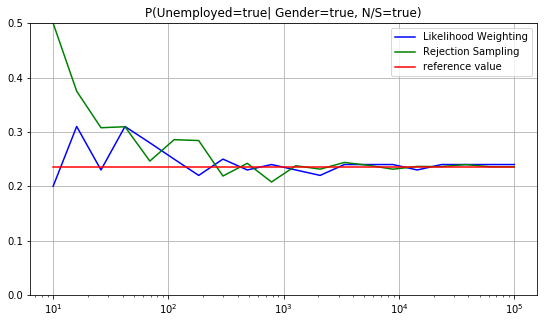

In [29]:
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.ylim(.0,.5)
plt.grid()
plt.title('P(Unemployed=true| Gender=true, N/S=true)')
LWplot, = plt.semilogx(results['sample_size'],results['punemployed_LW'],'b',label="Likelihood Weighting")
RSplot, = plt.semilogx(results['sample_size'],results['punemployed_RS'],'g',label="Rejection Sampling")
VEplot, = plt.semilogx(results['sample_size'],punemployed*np.ones(results.size),'r',label="reference value")
plt.legend(handles=[LWplot,RSplot,VEplot])

plt.show()

Increasing the number of samples, the estimate probability value becomes closer to the reference value.

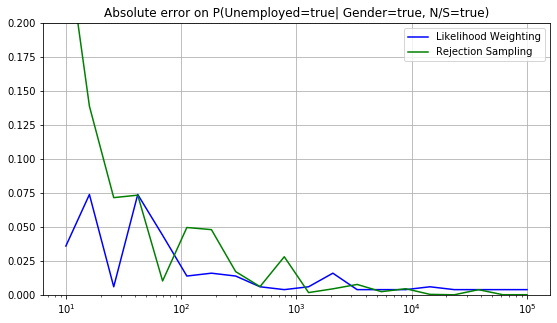

In [30]:
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.ylim(0,.2)
plt.grid()
plt.title('Absolute error on P(Unemployed=true| Gender=true, N/S=true)')
ELWplot, = plt.semilogx(results['sample_size'],results['e_unemployed_LW'],'b',label="Likelihood Weighting")
ERSplot, = plt.semilogx(results['sample_size'],results['e_unemployed_RS'],'g',label="Rejection Sampling")
plt.legend(handles=[ELWplot,ERSplot])